**Irfan Musa**

**PYTN-KS11-019**

Lakukan data visualization kepada dataset seperti line plot, area plot, scatter plot, box plot, histogram, bar chart, pie chart, word clouds, folium maps dan metode visualization plot yang telah dipelajari.

In [1]:
# Install segala yang sekiranya dibutuhkan
!pip install wordcloud
!pip install Pillow
!pip install seaborn
!pip install folium

In [6]:
#Import hal-hal yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import folium
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [4]:
#Input dataset
london_crime = pd.read_csv('london_crime_by_lsoa.csv')
london_crime

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


Data berisikan 13490604 baris dan 7 kolom.

In [7]:
#Pengambilan sampel dari populasi dataset
london_crime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


Berikut penjelasan dari kolom-kolom pada dataset diatas: <br>
- lsoa_code : kode area kepolisian
- borough : wilayah
- major_category : kategori kejahatan utama
- minor_category : kategori kejahatan kecil
- value : hitungan kejahatan untuk wilayah tersebut pada bulan tertentu
- year : tahun kejahatan terjadi
- month : bulan kejahatan terjadi

In [8]:
#Selalu awali dengan cek dataset
london_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [10]:
#Analisis singkat statistik
london_crime.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


# Visualisasi data

**Line Plot** <br>
Line plot merupakan cara untuk merepresentasikan data sebagai serangkaian titik yang dihubungkan oleh segmen garis lurus. Selanjutnya, akan ditunjukkan line plot terkait jumlah data kejahatan non utama terhadap waktu, yaitu kejahatan penyerangan yang membuat cidera.

In [12]:
a = london_crime[(london_crime['year'] < 2017)].groupby(['minor_category','year'])['value'].sum()
a

minor_category       year
Assault with Injury  2008    56586
                     2009    55297
                     2010    54173
                     2011    50768
                     2012    50369
                             ...  
Wounding/GBH         2012     7151
                     2013    15526
                     2014    21556
                     2015    23431
                     2016    23525
Name: value, Length: 288, dtype: int64

Pertama, kelompokkan secara terpisah terkait data kejahatan non utama.

In [13]:
a_1 = a['Assault with Injury']
a_1

year
2008    56586
2009    55297
2010    54173
2011    50768
2012    50369
2013    39929
2014    45677
2015    48164
2016    50038
Name: value, dtype: int64

Selanjutnya, diambil data kejahatan 'Assault with Injury' yang terjadi pada tahun-tahun tertera.

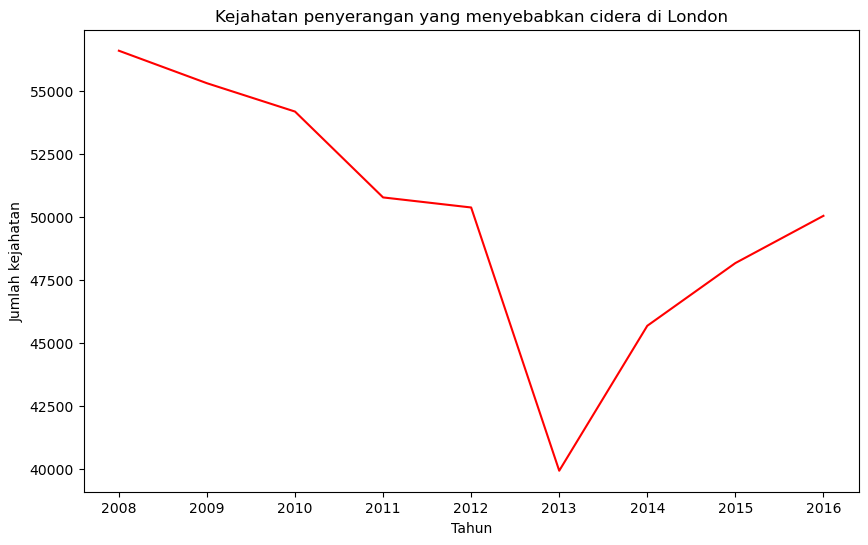

In [45]:
a_1.plot(kind='line', color = 'red', figsize=(10,6))
plt.title('Kejahatan penyerangan yang menyebabkan cidera di London')
plt.ylabel('Jumlah kejahatan')
plt.xlabel('Tahun')
plt.show()

Dengan demikian, diperoleh bahwa kejahatan penyerangan yang menyebabkan cidera di London paling banyak terjadi pada tahun 2008 dan paling sedikit terjadi pada tahun 2013.

**Area Plot** <br>
Area plot dibentuk berdasarkan grafik garis berwarna. Pengisian warna dapat memperjelas informasi dalam grafik. Warna yang dipakai di grafik area biasanya memiliki tingkat transparansi tertentu. Transparansi dapat membantu dalam mengamati hubungan tumpang tindih antara seri yang berbeda. Selanjutnya, akan ditunjukkan area plot terkait 5 wilayah yang memiliki jumlah data kejahatan paling banyak.

In [16]:
b = london_crime.pivot_table(index='borough', columns='year', values='value', aggfunc='sum')
b['total'] = b.sum(axis=1)
b_1 = b.sort_values(['total'], ascending=False)
b_2 = b_1.head()
b_2

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
borough,,,,,,,,,,
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024


Pertama, kelompokkan secara terpisah dan buat tabel baru terkait data kejahatan yang terjadi pada seluruh wilayah berdasarkan jumlah kejahatan paling besar ke paling kecil. Kemudian, definisikan variabel baru sebagai 5 wilayah dengan kejahatan terbesar.

In [24]:
b_3 = b_2.T
b_4 = b_3.drop('total',axis=0)
b_4.index.name=None
b_4

borough,Westminster,Lambeth,Southwark,Camden,Newham
2008,47846,31717,33470,32010,29752
2009,48456,31225,30623,31612,28610
2010,48116,31671,31320,31804,30728
2011,54243,33224,30723,33956,27978
2012,59226,33473,30737,31472,30067
2013,53852,31868,31128,28435,27577
2014,47564,31765,28912,27198,28005
2015,47395,33164,30260,29477,29217
2016,48330,34071,31636,29183,30090


Selanjutnya, dilakukan transpose antara baris dan kolom pada data. Kemudian, dihilangkan kolom total agar plot hanya berdasarkan wilayah yang tertera.

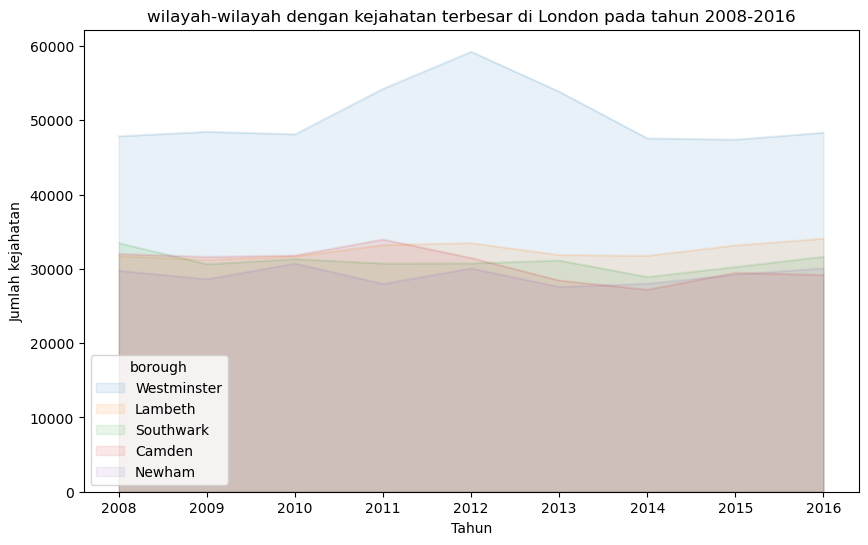

In [44]:
b_4.plot(kind='area', alpha=0.1, stacked=False, figsize=(10,6))
plt.title('wilayah-wilayah dengan kejahatan terbesar di London pada tahun 2008-2016')
plt.ylabel('Jumlah kejahatan')
plt.xlabel('Tahun')
plt.show()

Dengan demikian, diperoleh bahwa kejahatan yang terjadi pada 5 wilayah tersebut pun fluktuatif dan memiliki jumlah terbesar pada tahun-tahun yang berbeda. Sebagai contoh, pada wilayah westminster kejahatan tertinggi terjadi pada tahun 2012 sedangkan pada wilayah southwark kejahatan tertinggi terjadi pada tahun 2008.

**Scatter plot** <br>
Scatter plot merupakan metode untuk membandingkan variabel. Data dalam scatter juga biasanya digunakan untuk mengekspresikan suatu tren. Selanjutnya, akan ditunjukkan scatterplot terkait jumlah kejahatan yang terjadi di London pada tahun 2008-2016.

In [30]:
year = london_crime.pivot_table(index='year', values='value', aggfunc='sum')
year

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


Pertama, kelompokkan secara terpisah dan buat tabel baru terkait data kejahatan yang terjadi pada seluruh tahun beserta jumlah kejahatan yang terjadi mencakup seluruh wilayah di London.

In [32]:
c = year.reset_index()
c

,year,value
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


Selanjutnya, dilakukan reset index agar kolom year dapat dimuat pada kolom tersendiri.

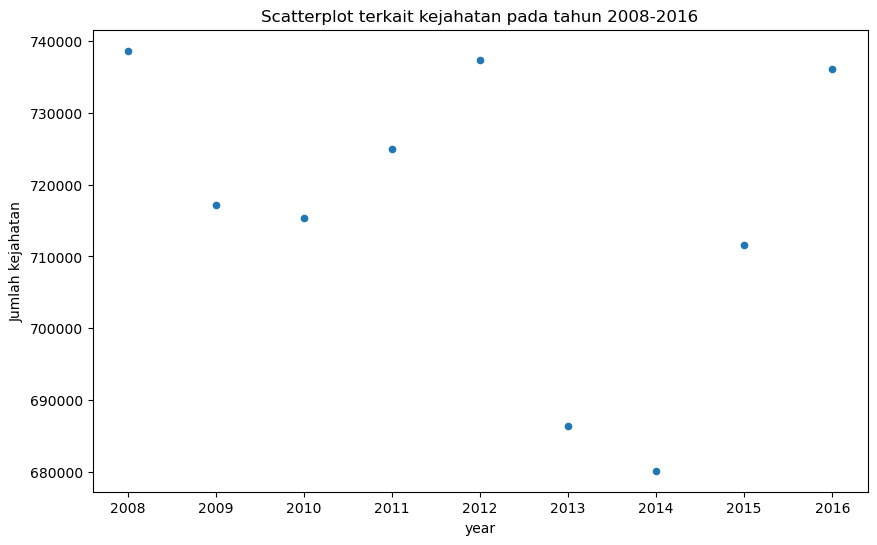

In [46]:
c.plot(kind='scatter',x='year',y='value',figsize=(10,6))
plt.title('Scatterplot terkait kejahatan pada tahun 2008-2016')

plt.ylabel('Jumlah kejahatan')
plt.show()

Dengan demikian, diperoleh bahwa kejahatan yang terjadi pada seluruh wilayah di London fluktuatif. Berdasarkan scatter plot, diperoleh bahwa kejahatan terendah terjadi pada tahun 2014 sedangkan kejahatan tertinggi terjadi pada tahun 2008.

**Box Plot** <br>
Box plot merupakan cara untuk merepresentasikan distribusi data melalui lima dimensi utama, yaitu : minimum, Q1, median(Q2), Q3, dan maksimum. Selanjutnya, akan ditunjukkan Perbandingan jumlah kejahatan di wilayah Lambeth dan Camden pada tahun 2008-2016 dengan visualisasi Box Plot.

In [47]:
d = b_4.iloc[:9, 1:4:2]
d

borough,Lambeth,Camden
2008,31717,32010
2009,31225,31612
2010,31671,31804
2011,33224,33956
2012,33473,31472
2013,31868,28435
2014,31765,27198
2015,33164,29477
2016,34071,29183


Pertama, kelompokkan secara terpisah dan buat tabel baru terkait data kejahatan yang terjadi di wilayah Lambeth dan Camden.

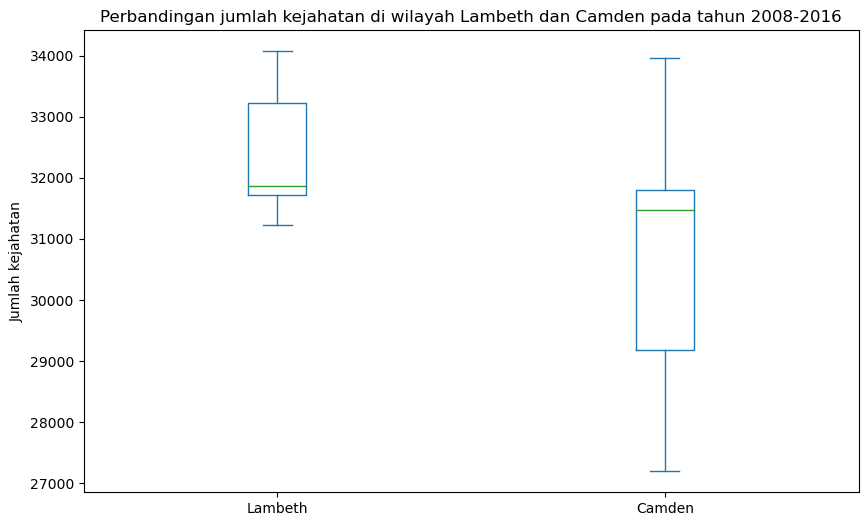

In [43]:
d.plot(kind='box', figsize=(10,6))
plt.title('Perbandingan jumlah kejahatan di wilayah Lambeth dan Camden pada tahun 2008-2016')
plt.ylabel('Jumlah kejahatan')
plt.show()

Berdasarkan box plot yang diperoleh, didapati bahwa kejahatan pada wilayah Lambeth dan Camden memiliki nilai-nilai pada lima dimensi utama sebagai berikut. <br>

|     |  Min  |  Q1  |  Median(Q2)  |  Q3  | Max |
| --- | --- | --- | --- | --- | --- |
|Lambeth | 31225 | 31717 | 31868 | 33224 | 34071 |
| Camden | 27198 | 29183 | 31472 | 31804 | 33956 |

<br>

**Histogram** <br>
Histogram merupakan cara untuk merepresentasikan distribusi frekuensi dataset. Selanjutnya, akan ditunjukkan Perbandingan frekuensi yang terjadi dalam jumlah kejahatan di wilayah Lambeth dan Camden pada tahun 2008-2016 dengan visualisasi Histogram.

In [49]:
d

borough,Lambeth,Camden
2008,31717,32010
2009,31225,31612
2010,31671,31804
2011,33224,33956
2012,33473,31472
2013,31868,28435
2014,31765,27198
2015,33164,29477
2016,34071,29183


Pertama, panggil kembali variabel d yang berisikan tabel Perbandingan jumlah kejahatan di wilayah Lambeth dan Camden pada tahun 2008-2016.

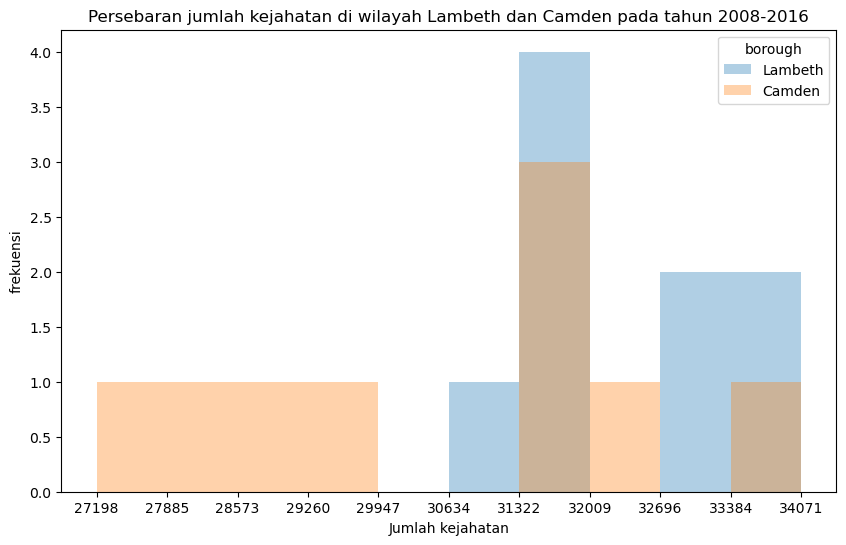

In [53]:
count, bin_edges = np.histogram(d)
d.plot(kind='hist',figsize=(10,6), bins=10,alpha=0.35,xticks=bin_edges)
plt.title('Persebaran jumlah kejahatan di wilayah Lambeth dan Camden pada tahun 2008-2016')
plt.ylabel('frekuensi')
plt.xlabel('Jumlah kejahatan')
plt.show()

Berdasarkan histogram yang diperoleh, dapat diasumsikan x merupakan jumlah kejahatan yang terjadi di wilayah Lambeth dan Camden per tahun. Pada data persebaran jumlah kejahatan di wilayah Lambeth dan Camden pada tahun 2008-2016 dimiliki nilai-nilai persebaran kejahatan sebagai berikut. <br>
- Lambeth <br>
Terdapat 1 data tahun yang memiliki jumlah kejahatan diantara $30634 \leq x \leq 31322$. <br>
Terdapat 4 data tahun yang memiliki jumlah kejahatan diantara $31322 \leq x \leq 32009$. <br>
Terdapat 2 data tahun yang memiliki jumlah kejahatan diantara $32696 \leq x \leq 33384$. <br>
Terdapat 4 data tahun yang memiliki jumlah kejahatan diantara $33384 \leq x \leq 34071$. <br>
- Camden
Terdapat 1 data tahun yang memiliki jumlah kejahatan diantara $27198 \leq x \leq 27885$. <br>
Terdapat 1 data tahun yang memiliki jumlah kejahatan diantara $27885 \leq x \leq 28573$. <br>
Terdapat 1 data tahun yang memiliki jumlah kejahatan diantara $28573 \leq x \leq 29260$. <br>
Terdapat 1 data tahun yang memiliki jumlah kejahatan diantara $29260 \leq x \leq 29947$. <br>
Terdapat 3 data tahun yang memiliki jumlah kejahatan diantara $31322 \leq x \leq 32009$. <br>
Terdapat 1 data tahun yang memiliki jumlah kejahatan diantara $32009 \leq x \leq 32696$. <br>
Terdapat 4 data tahun yang memiliki jumlah kejahatan diantara $33384 \leq x \leq 34071$.

**Bar chart** <br>
Bar chart vertikal merupakan cara merepresentasikan data dengan sumbu x digunakan untuk labelliing dan sumbu y atau panjang batang akan bersesuaian dengan besaran variabel yang diukur. Perbedaan Bar chart vertikal dan horizontal berada pada labelling. Selanjutnya, akan ditunjukkan Perbandingan jumlah kejahatan di 5 wilayah kejahatan tertingga pada tahun 2008-2016 dengan visualisasi Bar chart.

In [54]:
b_1

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
borough,,,,,,,,,,
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024
Croydon,29516,29784,29373,29830,30189,27444,27357,28089,28712,260294
Ealing,28947,28617,31360,29537,28832,25917,24978,26247,27127,251562
Islington,26273,25485,24693,24980,26268,23784,24679,27032,27092,230286
Tower Hamlets,23578,21959,23072,24712,26784,26258,25504,27493,29253,228613


Pertama, panggil kembali variabel b_1 yang selanjutnya data dalam variabel tersebut akan diolah kembali.

In [55]:
b_3 = b_1['total'].head()
b_3

borough
Westminster    455028
Lambeth        292178
Southwark      278809
Camden         275147
Newham         262024
Name: total, dtype: int64

Didefinisikan variabel b_3 sebagai hasil dari pengelompokkan secara terpisah terkait data jumlah kejahatan yang terjadi pada tahun 2008-2016.

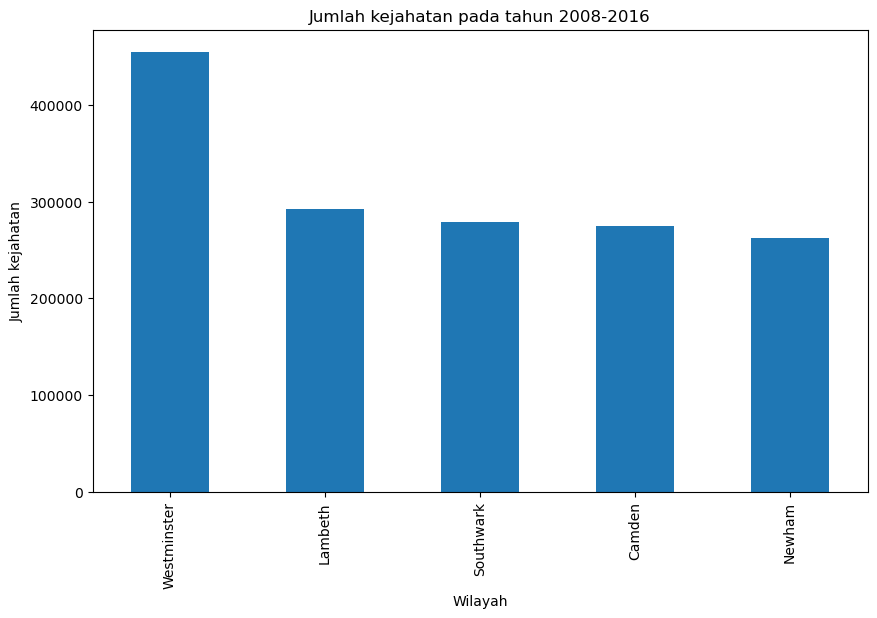

In [57]:
b_3.plot(kind='bar', figsize=(10,6))
plt.title('Jumlah kejahatan pada tahun 2008-2016')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah kejahatan')
plt.show()

Berdasarkan bar chart yang diperoleh, didapati bahwa jumlah kejahatan tertinggi yang terjadi pada tahun 2008-2016 berada di wilayah Westminster sejumlah $\pm 455000$ dan kejahatan terendah yang terjadi pada tahun bar chart berada di wilayah Newham sejumlah $\pm 262000$

**Pie chart** <br>
Pie chart merupakan grafik yang menampilkan proporsi numerik dengan membagi lingkaran sejumlah bagian yang proporsional. Selanjutnya, akan ditunjukkan proporsi kejahatan-kejahatan utama yang terjadi berdasarkan kategori kejahatannya dan divisualisasikan dengan pie chart.

In [58]:
e = london_crime['major_category'].value_counts()

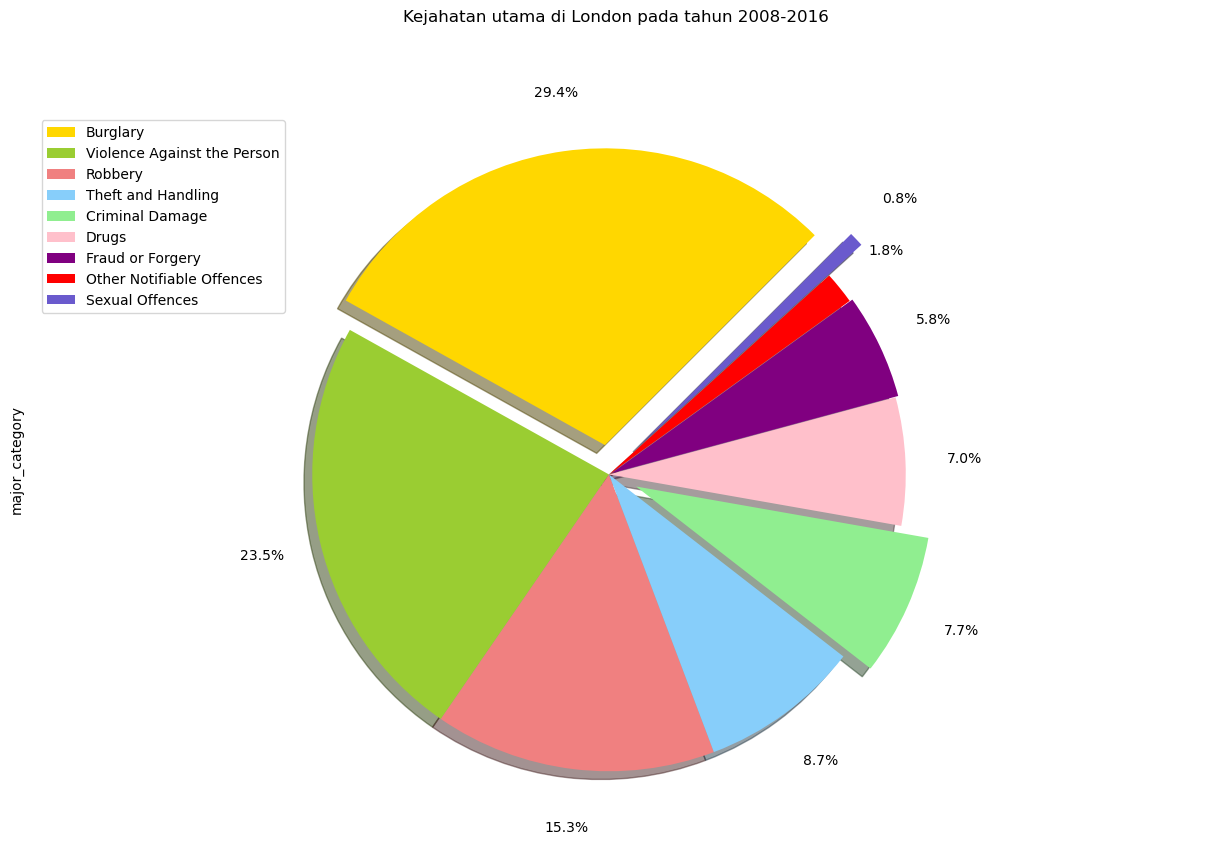

In [81]:
colors_list = ['gold','yellowgreen','lightcoral','lightskyblue','lightgreen','pink','purple','red','slateblue']
explode_list = [0.1, 0, 0, 0, 0.1, 0, 0.01, 0, 0.15]

e.plot(kind='pie',
        figsize=(15,9),
        autopct='%1.1f%%',
        startangle=45,
        shadow=True,
        labels=None,
        pctdistance=1.2,
        colors=colors_list,
        explode=explode_list)

plt.legend(labels=london_crime['major_category'].unique(),loc='upper left')
plt.axis('equal')
plt.title('Kejahatan utama di London pada tahun 2008-2016',y=1.12)
plt.show()

Berdasarkan data yang diberikan, lingkaran terbagi menjadi 9 bagian berdasarkan proporsinya, yaitu berdasarkan indeks kategori kejahatan utama ('major_category'). Akibatnya, diperoleh data bahwa kategori kejahatan utama terbanyak merupakan kejahatan perampokan dengan persentase sebanyak $29.4$% dan tersedikit merupakan kejahatan pelecehan seksual dengan persentase $0.8$%.

**Word Clouds** <br>
Word clouds merupakan salah satu bentuk visualisasi yang menampilkan kata-kata dari teks yang diberikan. Dalam hal ini ukuran memengaruhi isi, artinya ukuran font yang lebih besar untuk menunjukkan kata-kata yang lebih sering muncul dalam teks. Selanjutnya, akan ditunjukkan kata-kata yang sering muncul pada kolom kategori kejahatan utama ('major_category').

In [88]:
f = london_crime['major_category']

In [89]:
stopwords = set(STOPWORDS)

Pertama, definisikan variabel baru yang entrinya berupa sub data dari data set diawal. Selanjutnya, set stopword.

In [90]:
Logo = np.array(Image.open('Logo.jpeg'))

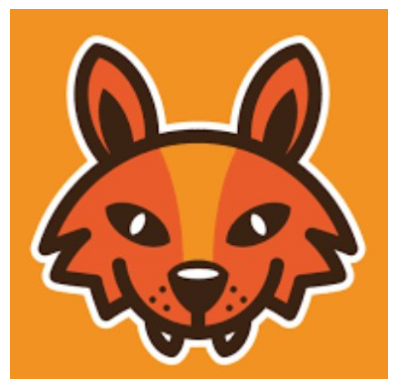

In [91]:
plt.imshow(Logo,cmap=plt.cm.gray)
plt.axis('off')
plt.show()

Unggah suatu gambar sabagai background nantinya.

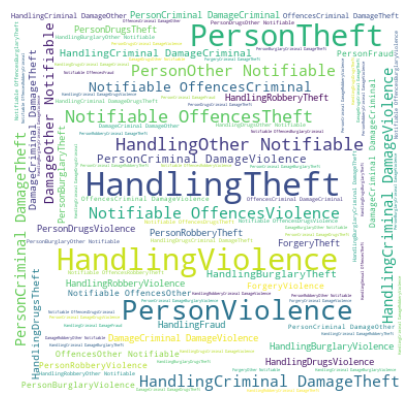

In [92]:
f_1 = WordCloud(background_color='white', max_words=2000, mask=Logo, stopwords=stopwords)

f_1.generate(''.join(f.values))
plt.figure(figsize=(8,5))
plt.imshow(f_1, interpolation='bilinear')
plt.axis('off')
plt.show()

Berdasarkan hasil yang didapat. Diketahui bahwa kata-kata seperti "Handling  Violace", "Handling Theft", "Handling Other" seringkali muncul sebab memilik ukuran teks yang besar pada persebaran wordclouds.

**Folium Maps** <br>
Folium maps merupakan sebuah library yang dapat memberi kemudahan dalam memvisualisasikan data yang dapat dimanipulasi dalam environment Python di atas sebuah peta.

Hal pertama yang dibutuhkan dalam penunjukkan sebuah lokasi ialah adanya titik kordinat. Oleh karena itu, diawal diberikan LU dan BB dari UGM. Selanjutnya diperoleh peta UGM seperti berikut.

In [87]:
LU = -7.76591
BB = 110.37742
UGM_map = folium.Map(location=[LU,BB],zoom_start=15,tiles='Stamen Terrain')
UGM_map

**Overall** <br>
- Kejahatan yang terjadi pada 5 wilayah kejahatan tertinggi fluktuatif dan memiliki jumlah terbesar pada tahun-tahun yang berbeda. Sebagai contoh, pada wilayah westminster kejahatan tertinggi terjadi pada tahun 2012 sedangkan pada wilayah southwark kejahatan tertinggi terjadi pada tahun 2008. <br>
- Kejahatan yang terjadi pada seluruh wilayah di London fluktuatif. Berdasarkan scatter plot, diperoleh bahwa kejahatan terendah terjadi pada tahun 2014 sedangkan kejahatan tertinggi terjadi pada tahun 2008. <br>
- Jumlah kejahatan tertinggi yang terjadi pada tahun 2008-2016 berada di wilayah Westminster sejumlah  ±455000. <br>
- Berdasarkan indeks kategori kejahatan utama ('major_category'), diperoleh data bahwa kategori kejahatan utama terbanyak merupakan kejahatan perampokan dengan persentase sebanyak  $29.4$%. Didapati pula kata-kata seperti "Handling Violace", "Handling Theft", "Handling Other" seringkali muncul sebab memiliki ukuran teks yang besar pada persebaran wordclouds. <br>
- Kejahatan penyerangan yang menyebabkan cidera di London paling banyak terjadi pada tahun 2008 dan paling sedikit terjadi pada tahun 2013. <br> 